In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading dataset from github**

In [ ]:
url = 'https://raw.githubusercontent.com/Aqeel-0/test/build/diabetes.csv'
df = pd.read_csv(url)
df.head()
column_names = list(df.columns.values)


In [ ]:
X = df.iloc[:,:-1]
y = df["Outcome"]
y.info(), X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


(None, None)

In [ ]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report, confusion_matrix
  from sklearn.metrics import accuracy_score
  print("Confusion Matrix : ")
  print(confusion_matrix(y_test, y_pred))
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### Classification using BernoulliNB Naive Bayes

In [ ]:
def FBouBernoulli(split, alpha_value = 1.0, binarize_value = 0.0, fit_prior_value = False):
  from sklearn.naive_bayes import BernoulliNB
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  classifier = BernoulliNB(alpha = alpha_value, binarize = binarize_value, fit_prior = fit_prior_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value) + " binarize: " + str(binarize_value) + " fit_prior: " +str(fit_prior_value))
  print("**********************************************")

  reports(y_test, y_pred)

## Train-Test split 0.2
FBouBernoulli(0.2)
FBouBernoulli(0.2, 2.0)
FBouBernoulli(0.2, 2.0, 3.5)
FBouBernoulli(0.2, 3.0, 5, True)



Train-test split: 0.2
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 
[[50 40]
 [39 25]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        90
           1       0.38      0.39      0.39        64

    accuracy                           0.49       154
   macro avg       0.47      0.47      0.47       154
weighted avg       0.49      0.49      0.49       154

Train-test split: 0.2
value: alpha: 2.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 
[[50 40]
 [39 25]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        90
           1       0.38      0.39      0.39        64

    accuracy                           0.49

In [ ]:
## Train-Test split 0.3
FBouBernoulli(0.3)
FBouBernoulli(0.3, 1.0, 1.5)
FBouBernoulli(0.3, 1.0, 1.5, True)

Train-test split: 0.3
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 
[[75 66]
 [51 39]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       141
           1       0.37      0.43      0.40        90

    accuracy                           0.49       231
   macro avg       0.48      0.48      0.48       231
weighted avg       0.51      0.49      0.50       231

Train-test split: 0.3
value: alpha: 1.0 binarize: 1.5 fit_prior: False
**********************************************
Confusion Matrix : 
[[80 61]
 [41 49]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       141
           1       0.45      0.54      0.49        90

    accuracy                           0.56

In [ ]:
## Train-Test split 0.4
FBouBernoulli(0.4)

Train-test split: 0.4
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 
[[126  65]
 [ 71  46]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       191
           1       0.41      0.39      0.40       117

    accuracy                           0.56       308
   macro avg       0.53      0.53      0.53       308
weighted avg       0.55      0.56      0.56       308



In [ ]:

## Train-Test split 0.5
FBouBernoulli(0.5)
FBouBernoulli(0.5, 1.0, 7.9)
FBouBernoulli(0.5, 1.0, 7.9, True)

Train-test split: 0.5
value: alpha: 1.0 binarize: 0.0 fit_prior: False
**********************************************
Confusion Matrix : 
[[163  85]
 [ 86  50]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       248
           1       0.37      0.37      0.37       136

    accuracy                           0.55       384
   macro avg       0.51      0.51      0.51       384
weighted avg       0.55      0.55      0.55       384

Train-test split: 0.5
value: alpha: 1.0 binarize: 7.9 fit_prior: False
**********************************************
Confusion Matrix : 
[[159  89]
 [ 62  74]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       248
           1       0.45      0.54      0.49       136

    accuracy                       

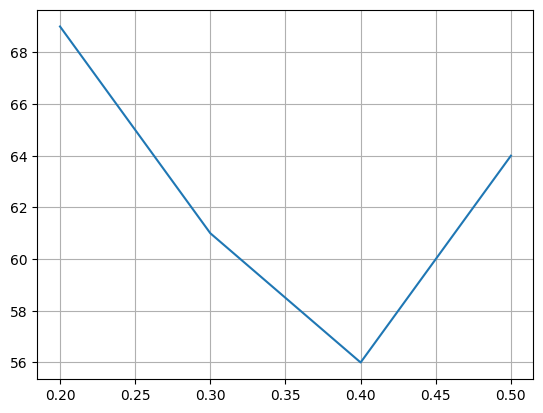

In [ ]:
x_points = np.array([0.2, 0.3, 0.4, 0.5])
y_points = np.array([69, 61, 56, 64])
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

## Classification using Multinomial Naive Bayes

In [ ]:
def FMultinomial(split, alpha_value = 1.0):
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
  classifier = MultinomialNB(alpha = alpha_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value))
  print("**********************************************")
  reports(y_test, y_pred)

## Train-Test split 0.2
FMultinomial(0.2)
FMultinomial(0.2, 2.3)









#61 63 63 64

Train-test split: 0.2
value: alpha: 1.0
**********************************************
Confusion Matrix : 
[[67 32]
 [32 23]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        99
           1       0.42      0.42      0.42        55

    accuracy                           0.58       154
   macro avg       0.55      0.55      0.55       154
weighted avg       0.58      0.58      0.58       154

Train-test split: 0.2
value: alpha: 2.3
**********************************************
Confusion Matrix : 
[[71 24]
 [32 27]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        95
           1       0.53      0.46      0.49        59

    accuracy                           0.64       154
   macro avg       0.61      0.60      0.60       1

In [ ]:
## Train-Test split 0.3
FMultinomial(0.3)
FMultinomial(0.3, 2.9)

Train-test split: 0.3
value: alpha: 1.0
**********************************************
Confusion Matrix : 
[[102  42]
 [ 43  44]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       144
           1       0.51      0.51      0.51        87

    accuracy                           0.63       231
   macro avg       0.61      0.61      0.61       231
weighted avg       0.63      0.63      0.63       231

Train-test split: 0.3
value: alpha: 2.9
**********************************************
Confusion Matrix : 
[[113  40]
 [ 45  33]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       153
           1       0.45      0.42      0.44        78

    accuracy                           0.63       231
   macro avg       0.58      0.58      0.58

In [ ]:
## Train-Test split 0.4
FMultinomial(0.4)
FMultinomial(0.4, 1.1)

Train-test split: 0.4
value: alpha: 1.0
**********************************************
Confusion Matrix : 
[[128  69]
 [ 58  53]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       197
           1       0.43      0.48      0.45       111

    accuracy                           0.59       308
   macro avg       0.56      0.56      0.56       308
weighted avg       0.60      0.59      0.59       308

Train-test split: 0.4
value: alpha: 1.1
**********************************************
Confusion Matrix : 
[[134  67]
 [ 58  49]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       201
           1       0.42      0.46      0.44       107

    accuracy                           0.59       308
   macro avg       0.56      0.56      0.56

In [ ]:
## Train-Test split 0.5
FMultinomial(0.5)
FMultinomial(0.5, 4.8)

Train-test split: 0.5
value: alpha: 1.0
**********************************************
Confusion Matrix : 
[[180  64]
 [ 76  64]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       244
           1       0.50      0.46      0.48       140

    accuracy                           0.64       384
   macro avg       0.60      0.60      0.60       384
weighted avg       0.63      0.64      0.63       384

Train-test split: 0.5
value: alpha: 4.8
**********************************************
Confusion Matrix : 
[[170  79]
 [ 77  58]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       249
           1       0.42      0.43      0.43       135

    accuracy                           0.59       384
   macro avg       0.56      0.56      0.56

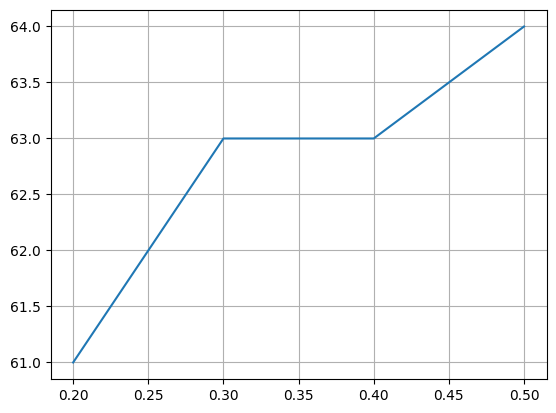

In [ ]:
x_points = np.array([0.2, 0.3, 0.4, 0.5])
y_points = np.array([61, 63, 63, 64])
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Guassian Naive Bayes**

In [ ]:
def FGaussian(split):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("**********************************************")
  reports(y_test, y_pred)

## Train-Test split 0.2
FGaussian(0.2)














Train-test split: 0.2
**********************************************
Confusion Matrix : 
[[86 17]
 [24 27]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       103
           1       0.61      0.53      0.57        51

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
## Train-Test split 0.3
FGaussian(0.3)

Train-test split: 0.3
**********************************************
Confusion Matrix : 
[[132  29]
 [ 24  46]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       161
           1       0.61      0.66      0.63        70

    accuracy                           0.77       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.78      0.77      0.77       231



In [ ]:
## Train-Test split 0.4
FGaussian(0.4)

Train-test split: 0.4
**********************************************
Confusion Matrix : 
[[169  24]
 [ 50  65]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       193
           1       0.73      0.57      0.64       115

    accuracy                           0.76       308
   macro avg       0.75      0.72      0.73       308
weighted avg       0.76      0.76      0.75       308



In [ ]:

## Train-Test split 0.5
FGaussian(0.5)

Train-test split: 0.5
**********************************************
Confusion Matrix : 
[[209  40]
 [ 59  76]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       249
           1       0.66      0.56      0.61       135

    accuracy                           0.74       384
   macro avg       0.72      0.70      0.71       384
weighted avg       0.74      0.74      0.74       384



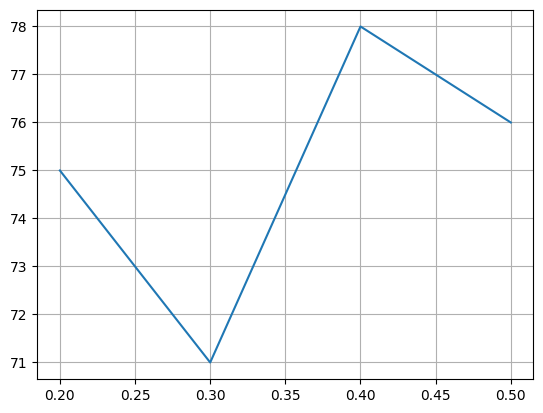

In [ ]:
x_points = np.array([0.2, 0.3, 0.4, 0.5])
y_points = np.array([75, 71, 78, 76])
plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Decision Tree**

In [ ]:
def decision_tree(split, criterion_value):
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)

  classifier = DecisionTreeClassifier(criterion = criterion_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("Value: Entropy: " + criterion_value)
  print("**********************************************")
  reports(y_test, y_pred)
  fig = plt.figure(figsize=(12,8))
  _ = tree.plot_tree(classifier,
                    feature_names=column_names,
                    class_names='outcome',
                    filled=True)



Train-test split: 0.2
Value: Entropy: entropy
**********************************************
Confusion Matrix : 
[[76 23]
 [26 29]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.56      0.53      0.54        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



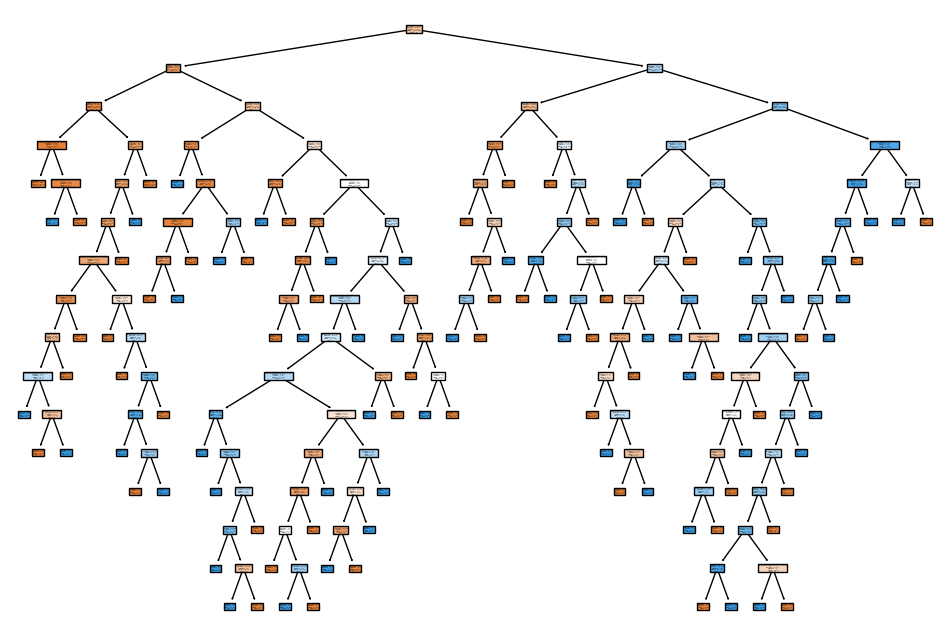

In [ ]:
decision_tree(0.2, 'entropy')

Train-test split: 0.2
Value: Entropy: gini
**********************************************
Confusion Matrix : 
[[74 19]
 [29 32]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        93
           1       0.63      0.52      0.57        61

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.68      0.69      0.68       154



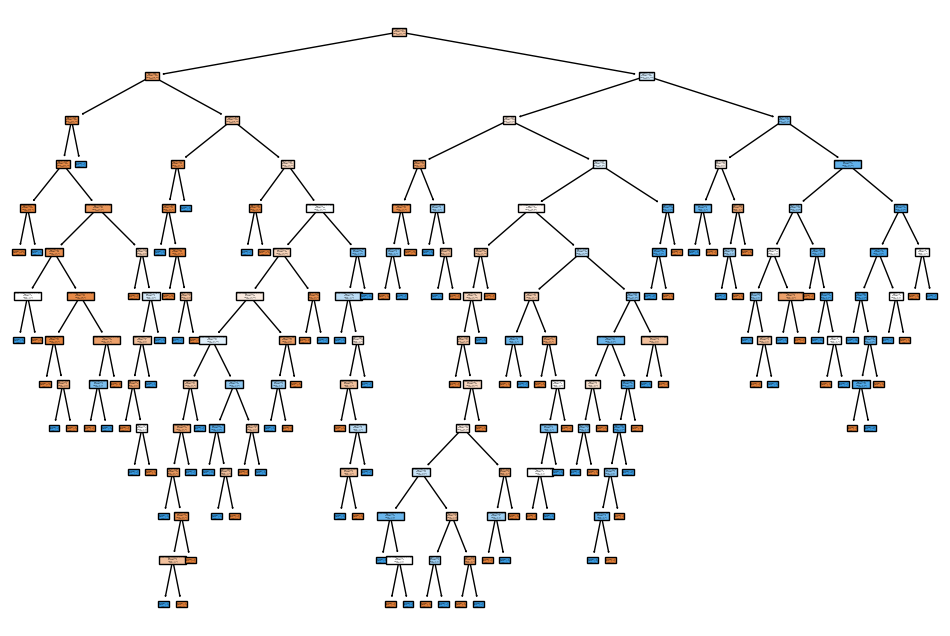

In [ ]:
decision_tree(0.2, 'gini')

Train-test split: 0.3
Value: Entropy: entropy
**********************************************
Confusion Matrix : 
[[112  35]
 [ 42  42]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       147
           1       0.55      0.50      0.52        84

    accuracy                           0.67       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.66      0.67      0.66       231



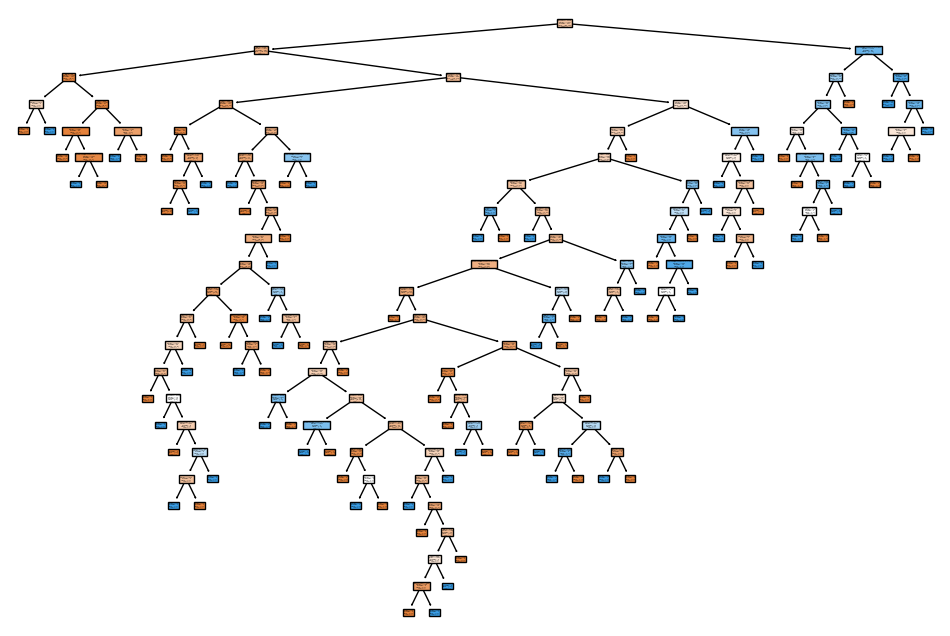

In [ ]:
decision_tree(0.3, 'entropy')

Train-test split: 0.3
Value: Entropy: gini
**********************************************
Confusion Matrix : 
[[113  44]
 [ 28  46]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       157
           1       0.51      0.62      0.56        74

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.71      0.69      0.70       231



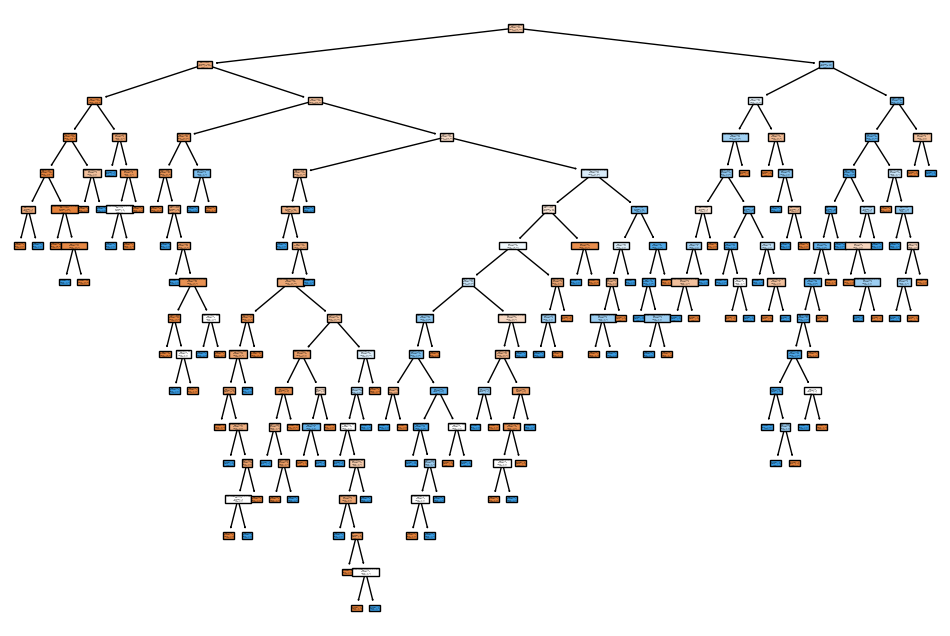

In [ ]:
decision_tree(0.3, 'gini')

Train-test split: 0.4
Value: Entropy: entropy
**********************************************
Confusion Matrix : 
[[135  47]
 [ 56  70]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       182
           1       0.60      0.56      0.58       126

    accuracy                           0.67       308
   macro avg       0.65      0.65      0.65       308
weighted avg       0.66      0.67      0.66       308



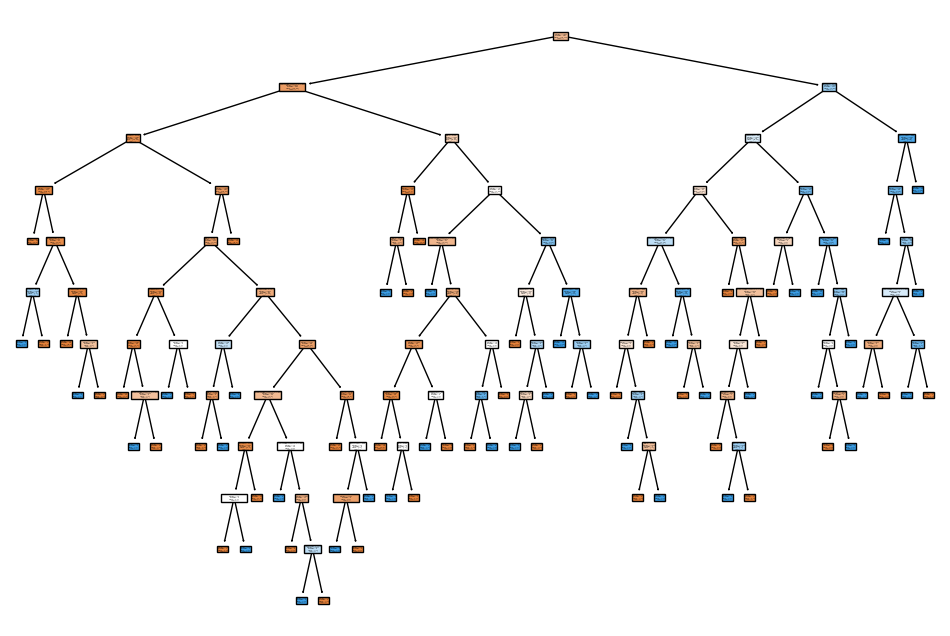

In [ ]:
decision_tree(0.4, 'entropy')

Train-test split: 0.4
Value: Entropy: gini
**********************************************
Confusion Matrix : 
[[153  44]
 [ 50  61]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       197
           1       0.58      0.55      0.56       111

    accuracy                           0.69       308
   macro avg       0.67      0.66      0.66       308
weighted avg       0.69      0.69      0.69       308



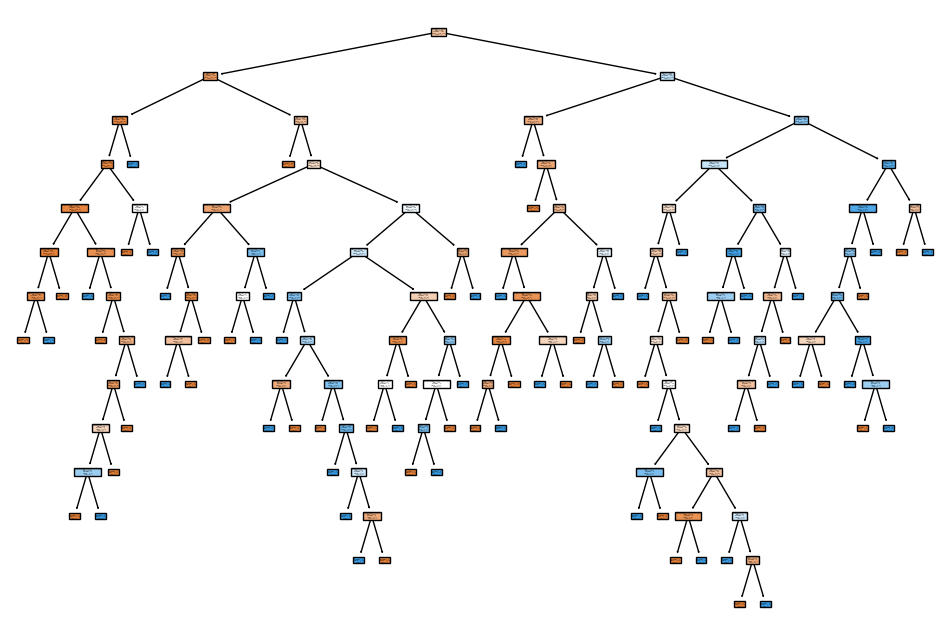

In [ ]:
decision_tree(0.4, 'gini')

Train-test split: 0.5
Value: Entropy: entropy
**********************************************
Confusion Matrix : 
[[203  56]
 [ 59  66]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       259
           1       0.54      0.53      0.53       125

    accuracy                           0.70       384
   macro avg       0.66      0.66      0.66       384
weighted avg       0.70      0.70      0.70       384



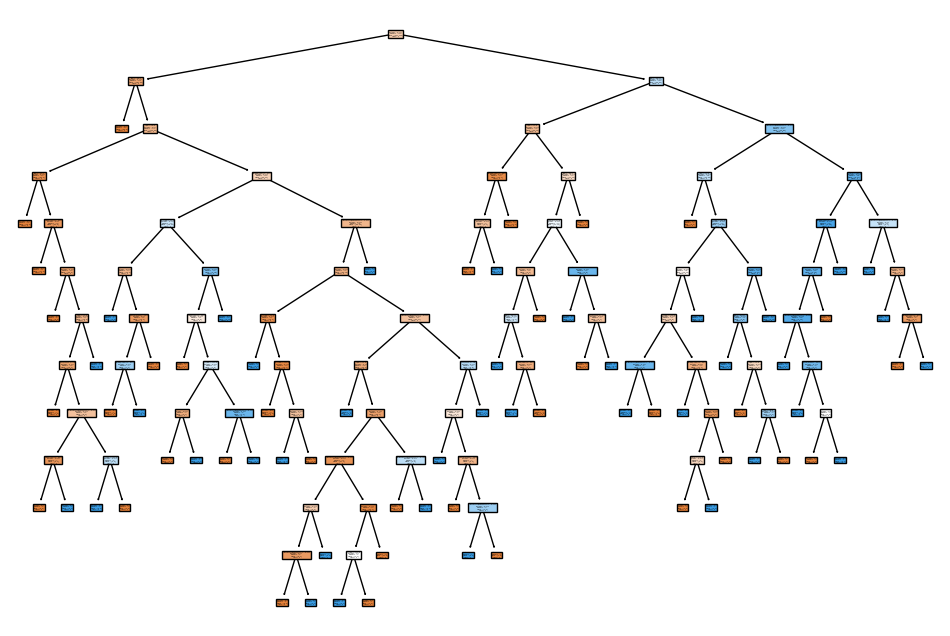

In [ ]:
decision_tree(0.5, 'entropy')

Train-test split: 0.5
Value: Entropy: gini
**********************************************
Confusion Matrix : 
[[209  53]
 [ 51  71]]
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       262
           1       0.57      0.58      0.58       122

    accuracy                           0.73       384
   macro avg       0.69      0.69      0.69       384
weighted avg       0.73      0.73      0.73       384



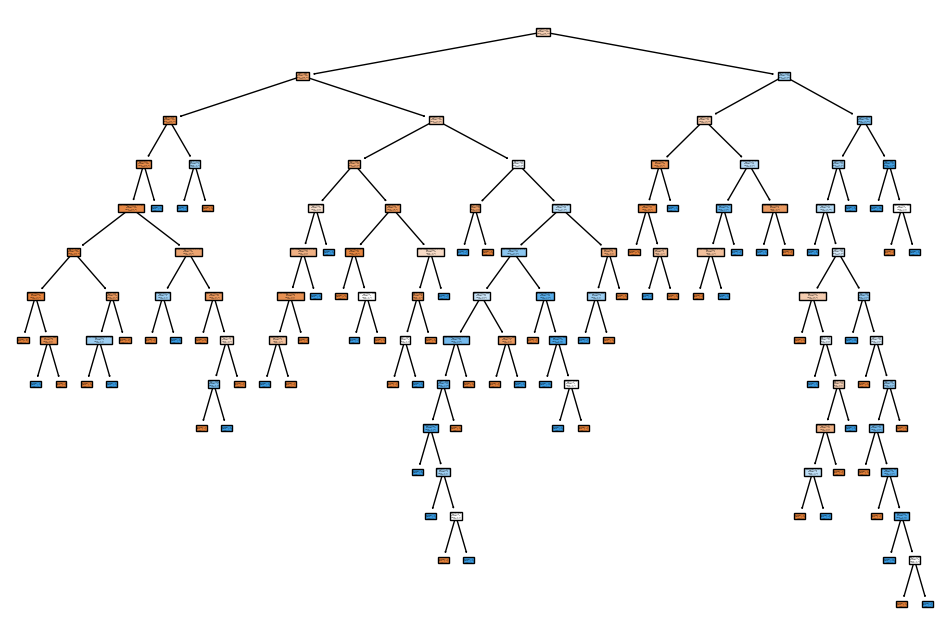

In [ ]:
decision_tree(0.5, 'gini')